<a href="https://colab.research.google.com/github/Sohammz/BrowserHistoryAnalyzer/blob/main/Browser_History_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas

**UPLOAD YOUR FILE**

In [4]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f" Uploaded file: {filename}")

 Upload your Chrome 'History' file (usually found in:)
C:\Users\<username>\AppData\Local\Google\Chrome\User Data\Default\History


Saving History to History
 Uploaded file: History


**MAIN PROJECT IDEA**

In [18]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta

def fetch_history_data(history_path):
    """Extract URLs, titles, and visit times from the uploaded Chrome history DB."""
    temp_copy = "temp_history.db"
    with open(history_path, "rb") as src, open(temp_copy, "wb") as dst:
        dst.write(src.read())

    conn = sqlite3.connect(temp_copy)
    cursor = conn.cursor()

    query = """
        SELECT urls.url, urls.title, visits.visit_time
        FROM urls, visits
        WHERE urls.id = visits.url
        ORDER BY visits.visit_time DESC
        LIMIT 1000;  -- limit for readability
    """
    cursor.execute(query)
    rows = cursor.fetchall()
    conn.close()

    data = []
    for url, title, visit_time in rows:
        epoch_start = datetime(1601, 1, 1)
        visit_dt = epoch_start + timedelta(microseconds=visit_time)
        data.append((url, title, visit_dt))
    df = pd.DataFrame(data, columns=["URL", "Title", "Visit Time"])
    return df
df = fetch_history_data(filename)
print("Extracted", len(df), "records")
df.head()

Extracted 1000 records


,URL,Title,Visit Time
0,file:///C:/Users/Soham%20Wanganekar/Downloads/...,Interim Selects List - Shah Anchor (002),2025-10-27 15:30:12.293193
1,https://web.whatsapp.com/,(40) WhatsApp,2025-10-27 15:26:15.123804
2,https://www.youtube.com/watch?v=v3xCPBPMjw4&li...,(96) Jaake Aana Yaara Full Video Song | Kubera...,2025-10-26 19:01:10.045891
3,https://www.youtube.com/watch?v=palMj0iq-3g&li...,(96) Brahmakalasha Kannada Video Song - Kantar...,2025-10-26 18:59:38.334059
4,https://www.youtube.com/watch?v=pxZTbeobtW0&li...,(96) Aaya Re Toofan - Lyric Video | Chhaava| V...,2025-10-26 18:54:52.219728


**TOP VISITED DOMAIN**

In [7]:
def analyze_top_domains(df, top_n=10):
    """Show most visited domains."""
    domains = df["URL"].str.extract(r"(https?://[^/]+)/")[0].value_counts().head(top_n)
    print("\n Top Visited Domains:")
    display(domains)

analyze_top_domains(df)



 Top Visited Domains:


,count
0,
https://www.youtube.com,355
https://accounts.google.com,83
https://www.hackerearth.com,60
https://developer.vuforia.com,37
https://studio.readyplayer.me,36
https://web.whatsapp.com,35
https://mail.google.com,32
https://acrobat.adobe.com,31
https://aesrchrdr.com,29


**TOP WEBSITE FROM LAST 7 DAYS**

In [17]:
from datetime import timedelta

def filter_by_date(df, days=7):
    recent_date = datetime.now() - timedelta(days=days)
    filtered = df[df["Visit Time"] > recent_date]
    print(f"Showing visits from the last {days} days ({len(filtered)} records):")
    return filtered

recent_df = filter_by_date(df, days=7)
recent_df.head()


Showing visits from the last 7 days (494 records):


,URL,Title,Visit Time,Hour
0,file:///C:/Users/Soham%20Wanganekar/Downloads/...,Interim Selects List - Shah Anchor (002),2025-10-27 15:30:12.293193,15
1,https://web.whatsapp.com/,(40) WhatsApp,2025-10-27 15:26:15.123804,15
2,https://www.youtube.com/watch?v=v3xCPBPMjw4&li...,(96) Jaake Aana Yaara Full Video Song | Kubera...,2025-10-26 19:01:10.045891,19
3,https://www.youtube.com/watch?v=palMj0iq-3g&li...,(96) Brahmakalasha Kannada Video Song - Kantar...,2025-10-26 18:59:38.334059,18
4,https://www.youtube.com/watch?v=pxZTbeobtW0&li...,(96) Aaya Re Toofan - Lyric Video | Chhaava| V...,2025-10-26 18:54:52.219728,18


**FINDING PARTICULAR DOMAIN**

In [10]:
def search_keyword(df, keyword):
    results = df[df["URL"].str.contains(keyword, case=False, na=False)]
    print(f"Found {len(results)} results for '{keyword}':")
    return results

search_keyword(df, "youtube").head()


Found 357 results for 'youtube':


,URL,Title,Visit Time
2,https://www.youtube.com/watch?v=v3xCPBPMjw4&li...,(96) Jaake Aana Yaara Full Video Song | Kubera...,2025-10-26 19:01:10.045891
3,https://www.youtube.com/watch?v=palMj0iq-3g&li...,(96) Brahmakalasha Kannada Video Song - Kantar...,2025-10-26 18:59:38.334059
4,https://www.youtube.com/watch?v=pxZTbeobtW0&li...,(96) Aaya Re Toofan - Lyric Video | Chhaava| V...,2025-10-26 18:54:52.219728
5,https://www.youtube.com/watch?v=ubQ4g7FqSCY&li...,(96) Fire Song (Hindi) - Lyrical | Kanguva | S...,2025-10-26 18:48:46.711079
6,https://www.youtube.com/watch?v=ld8Zb4b5e1E&li...,"(96) Not A Teaser (Theme) (From ""Saripodhaa Sa...",2025-10-26 18:48:14.113544


**VISUALIZING TOP VISITED DOMAIN**

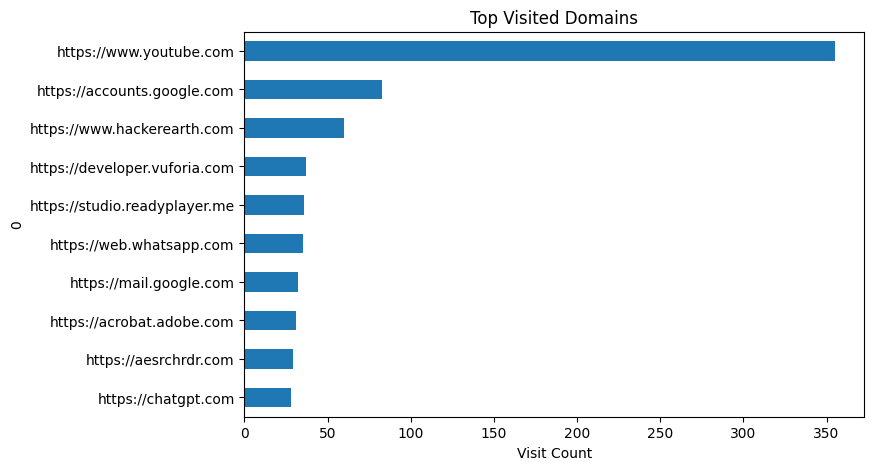

In [11]:
import matplotlib.pyplot as plt

def plot_top_domains(df, top_n=10):
    domains = df["URL"].str.extract(r"(https?://[^/]+)/")[0].value_counts().head(top_n)
    domains.plot(kind='barh', figsize=(8,5))
    plt.gca().invert_yaxis()
    plt.title("Top Visited Domains")
    plt.xlabel("Visit Count")
    plt.show()

plot_top_domains(df)


**BROWSING ACTIVITY OF USER**

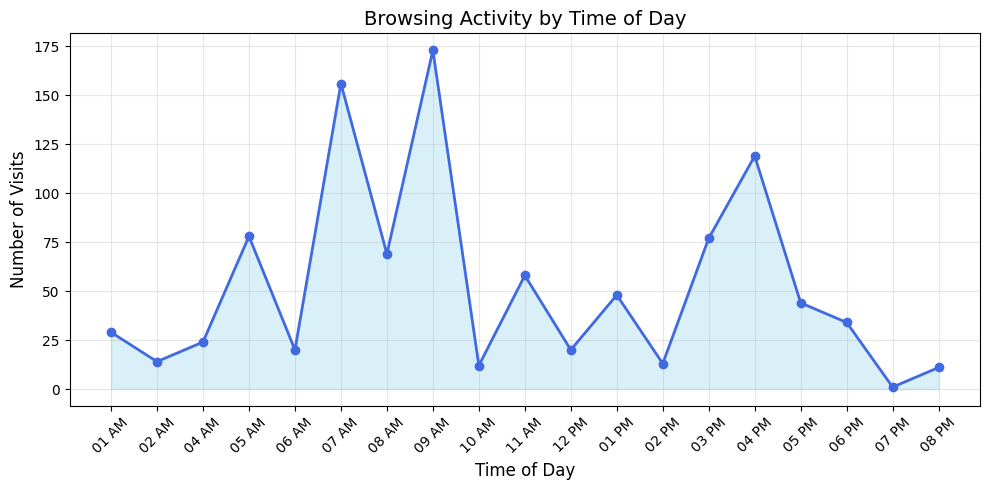

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
df["Hour"] = df["Visit Time"].dt.hour
activity = df["Hour"].value_counts().sort_index()
time_labels = [datetime.strptime(str(h), "%H").strftime("%I %p") for h in activity.index]
plt.figure(figsize=(10,5))
plt.plot(time_labels, activity.values, marker="o", linewidth=2, color="royalblue")
plt.fill_between(time_labels, activity.values, color="skyblue", alpha=0.3)
plt.title("Browsing Activity by Time of Day", fontsize=14)
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**DOWNLOADING IN REPORT FORMAT**

In [8]:
output_file = "browser_history_report.csv"
df.to_csv(output_file, index=False)

print(f"Report saved as {output_file}")
files.download(output_file)


Report saved as browser_history_report.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>